####**Estuardo J. Díaz García (22008995)**

---

# **Tarea 5: vectores en Numpy**

**Sección #1**: Términos a investigar

### **Proyección vectorial:**

Un vector se puede proyectar sobre otro vector o sobre un plano.
Coloquialmente, podríamos explicarlo como la "sombra" que un vector proyectaría sobre otro vector o sobre un plano.
Representándolo gráficamente, tenemos el vector **u** y el **v**, como aparecen abajo. Ambos se unen formando un ángulo alfa (α).

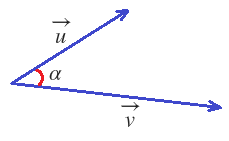

Fuente: https://ekuatio.com/

Al trazar una recta perpendicular desde el punto en donde finaliza el vector u hasta tocar al vector v se tendría el punto al cual llegaría la proyección de u sobre v.

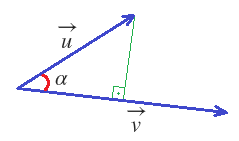

Fuente: https://ekuatio.com/

Ahora, al trazar un nuevo vector que iría del origen de ambos (u y v) hasta el punto en donde la línea perpendicular que trazamos toca al vector v obtendríamos el vector proyectado.

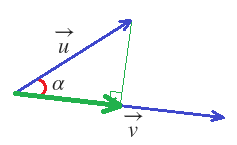

Fuente: https://ekuatio.com/

Esto, dependiendo de el ángulo entre ambos vectores, podría generar una proyección hacia la dirección contraria del vector sobre el cual se está proyectando.

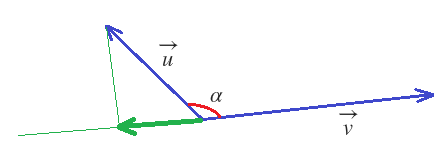
Fuente: https://ekuatio.com/

Para calcular la proyección del vector u sobre el vector v se utiliza la fórmula siguiente:
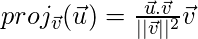



Text(0, 0.5, 'y')

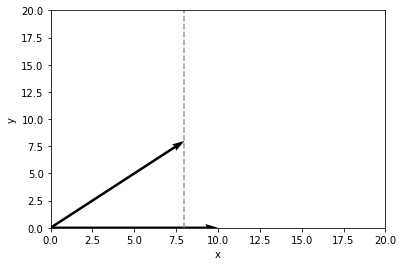

In [1]:
#Ejemplo. Proyección vectorial
import numpy as np 
import matplotlib.pyplot as plt

#tenemos los vectores siguientes:
u=np.array([8,8])
v=np.array([10,0])

#los graficamos para una mejor visualización
plt.quiver([0,0],[0,0],[u[0],v[0]],[u[1],v[1]],scale_units="xy",angles="xy",scale=1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.axvline(x=8,color="grey",linestyle="--", alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')

In [2]:
#Determinamos la proyección del vector u sobre el vector v
producto_punto=u.dot(v)
magnitud_v = v.dot(v) #la magnitud del vector v al cuadrado
proyec_u_v=((producto_punto/magnitud_v)*v)
print(proyec_u_v)

[8. 0.]


In [3]:
proyec_u_v.shape

(2,)

Text(0, 0.5, 'y')

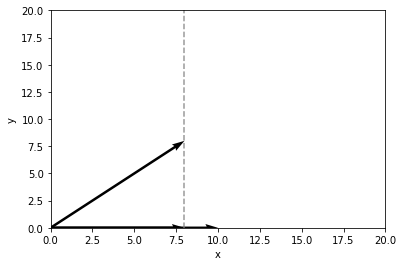

In [4]:
#los graficamos nuevamente para una mejor visualización
plt.quiver([0,0,0],[0,0,0],[u[0],v[0],proyec_u_v[0]],[u[1],v[1],proyec_u_v[1]],scale_units="xy",angles="xy",scale=1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.axvline(x=8,color="grey",linestyle="--", alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')

#vemos ahora que el nuevo vector "proyec_u_v" aparece ya en la gráfica

Un **ejemplo** de uso para la proyección vectorial 

### **Producto cruz o producto vectorial:**

El producto vectorial o producto cruz de dos vectores se representa como a x b (se interpreta como "a cruz b"). Matemáticamente, el producto cruz de un vector a por un vector v tendría la fórmula siguiente:


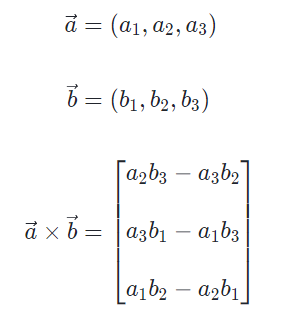

Fuente: Khan academy (https://es.khanacademy.org/)

In [9]:
#Al tener vectores a y b
a = np.array([13,26,91])
b = np.array([25,-43,11])

#Obtenemos el producto cruz de a x b con la sentencia np.cross(a,b)
np.cross(a,b)

array([ 4199,  2132, -1209])